In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Merging sales data in to single CSV file
os.listdir('E:\coursers\excel\Dataset') # enter the location of the folder having the dataset files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
files =[]
for i in os.listdir('E:\coursers\excel\Dataset'):
    files.append(i)
for i in files:
    print(i)             # here we are making the list of all dataset files

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
#concat all the csv files to single dataframe
allData = pd.DataFrame()  # creating empty dataframe

for i in files:
    current_df = pd.read_csv('E:/coursers/excel/Dataset/'+i)  # note all / at the end of location and change (\) to (/)
    allData = pd.concat([allData, current_df])
print (allData.shape)

(186850, 6)


In [5]:
allData.to_csv('E:/coursers/excel/Dataset/allData.csv', index = False)  # to download the contactenated CSV file

In [6]:
allData.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
# we have to remove null values
allData.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
allData = allData.dropna()
allData.shape

(186305, 6)

In [10]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
allData.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [14]:
def month(s):
    s=s.split('/')
    return s[0]

In [15]:
allData['month'] = allData['Order Date'].apply(month)
allData.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [17]:
def date(s):
    s=s.split(' ')
    return s[0]

In [18]:
allData['date'] = allData['Order Date'].apply(date)
allData.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,04/19/19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,04/07/19


In [19]:
def time(s):
    s=s.split(' ')
    return s[1]

In [20]:
allData['time'] = allData['Order Date'].apply(time)
allData.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,04/07/19,22:30


In [27]:
# Q1) Which month is best for selling products?

allData['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [28]:
allData = allData[allData.month != 'Order Date']

In [31]:
allData['month'] = allData['month'].astype(int)
allData['Quantity Ordered'] = allData['Quantity Ordered'].astype(int)
allData['Price Each'] = allData['Price Each'].astype(float)

In [42]:
allData.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
date                 object
time                 object
sales               float64
dtype: object

In [33]:
allData['sales'] = allData['Quantity Ordered'] * allData['Price Each']
allData.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,time,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,04/19/19,08:46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,04/07/19,22:30,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,04/12/19,14:38,600.00


In [35]:
allData.groupby('month')['sales'].sum()

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

Text(0, 0.5, 'Sales (USD $)')

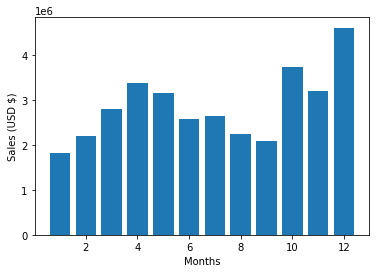

In [45]:
months = range(1,13)
plt.bar(months, allData.groupby('month')['sales'].sum())
plt.xlabel('Months')
plt.ylabel('Sales (USD $)')

# Dec month had highest sale

In [47]:
# Q2) Which city orders the highest number of products?

def city(s):
    s=s.split(',')
    return s[1]

In [48]:
allData['city'] = allData['Purchase Address'].apply(city)
allData.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,time,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19,08:46:00,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,22:30:00,99.99,Boston


In [49]:
allData.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

Text(0, 0.5, 'No. of Orders')

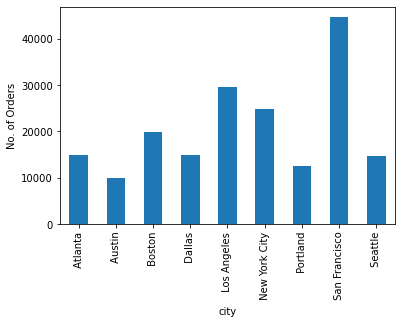

In [51]:
allData.groupby('city')['city'].count().plot.bar()
plt.ylabel('No. of Orders')

# San Fancisco orders the highest no. of products

In [54]:
# Q3) What time of the day do people order the most goods online?
allData['hour'] = pd.to_datetime(allData['Order Date']).dt.hour
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,time,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19,08:46:00,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,22:30:00,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38:00,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38:00,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,09:27:00,11.99,Los Angeles,9


In [55]:
allData['Date'] = pd.to_datetime(allData['Order Date']).dt.date
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,time,sales,city,hour,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19,08:46:00,23.90,Dallas,8,2019-04-19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,22:30:00,99.99,Boston,22,2019-04-07
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38:00,600.00,Los Angeles,14,2019-04-12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38:00,11.99,Los Angeles,14,2019-04-12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,09:27:00,11.99,Los Angeles,9,2019-04-30


In [56]:
allData['Time'] = pd.to_datetime(allData['Order Date']).dt.time
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,time,sales,city,hour,Date,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19,08:46:00,23.90,Dallas,8,2019-04-19,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,22:30:00,99.99,Boston,22,2019-04-07,22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38:00,600.00,Los Angeles,14,2019-04-12,14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38:00,11.99,Los Angeles,14,2019-04-12,14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,09:27:00,11.99,Los Angeles,9,2019-04-30,09:27:00


In [57]:
allData.drop(['date','time'], axis = 'columns', inplace = True)

In [58]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int32  
 7   sales             185950 non-null  float64
 8   city              185950 non-null  object 
 9   hour              185950 non-null  int64  
 10  Date              185950 non-null  object 
 11  Time              185950 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 17.0+ MB


In [59]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,Date,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,2019-04-19,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,2019-04-07,22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,2019-04-12,14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,2019-04-12,14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,2019-04-30,09:27:00


In [60]:
hour =[]
hour.sort()
for i in allData['hour']:
    hour.append(i)
hour_ = list(set(hour))
print(hour_)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [61]:
count=[]
for i in range(24):
    x=hour.count(hour_[i])
    count.append(x)
print(count)
    

[3910, 2350, 1243, 831, 854, 1321, 2482, 4011, 6256, 8748, 10944, 12411, 12587, 12129, 10984, 10175, 10384, 10899, 12280, 12905, 12228, 10921, 8822, 6275]


Text(0, 0.5, 'No. of Orders')

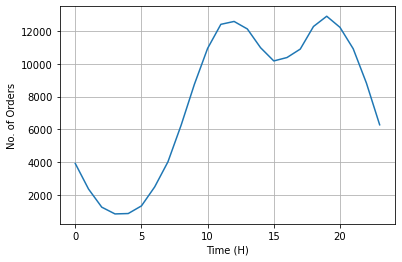

In [68]:
plt.grid()
plt.plot(hour_,count)
plt.xlabel('Time (H)')
plt.ylabel('No. of Orders')

#From the plot above, it can be inferred that the peak ordering hours are during 10 AM to1 PM and 6 PM to 8 PM, and that these are likely the optimum hours to run commercials to increase product sales.

In [66]:
allData['Product'].nunique()

19

Text(0, 0.5, 'Quantity of Orders')

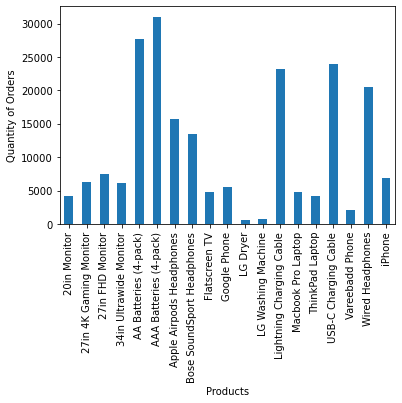

In [69]:
allData.groupby('Product')['Quantity Ordered'].sum().plot.bar()
plt.xlabel('Products')
plt.ylabel('Quantity of Orders')

# AAA Batteries (4-pack) is the top-selling product

In [73]:
products = allData.groupby('Product')['Quantity Ordered'].sum().index
products

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [74]:
quantity = allData.groupby('Product')['Quantity Ordered'].sum()
quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [77]:
prices = allData.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-80-715ea761122b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size =10)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 3600x2160 with 0 Axes>

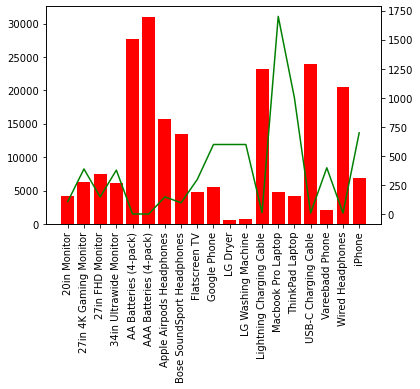

In [80]:
plt.figure(figsize=(50,30))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color = 'r')
ax2.plot(products, prices, color ='g')
ax1.set_xticklabels(products, rotation = 'vertical', size =10)

#A product's pricing determines how well it will sell.The amount ordered will decrease as the product's price increases and vice versa.

In [82]:
allData['Day'] = pd.to_datetime(allData['Date']).dt.day_name()
allData.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,Date,Time,Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,2019-04-19,08:46:00,Friday
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,2019-04-07,22:30:00,Sunday
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,2019-04-12,14:38:00,Friday


In [83]:
allData.groupby('Day')['Order ID'].count()

Day
Friday       26247
Monday       26547
Saturday     26492
Sunday       26551
Thursday     26461
Tuesday      27175
Wednesday    26477
Name: Order ID, dtype: int64

Text(0, 0.5, 'No. of Orders')

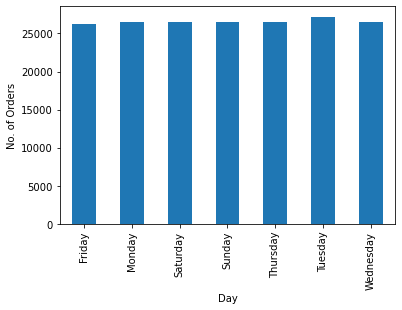

In [84]:
allData.groupby('Day')['Order ID'].count().plot.bar()
plt.xlabel('Day')
plt.ylabel('No. of Orders')

# on an average all the days of the week has same no. of orders

In [85]:
allData.groupby('Day')['sales'].sum()

Day
Friday       4.855938e+06
Monday       4.883327e+06
Saturday     4.904357e+06
Sunday       4.932170e+06
Thursday     4.839465e+06
Tuesday      5.087957e+06
Wednesday    4.988822e+06
Name: sales, dtype: float64

Text(0, 0.5, 'Sales')

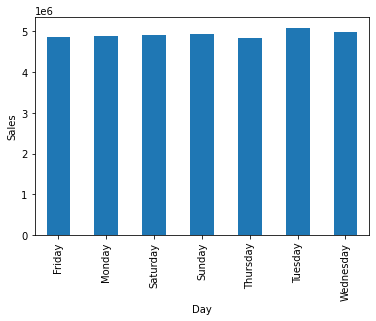

In [86]:
allData.groupby('Day')['sales'].sum().plot.bar()
plt.xlabel('Day')
plt.ylabel('Sales')

# Thrusday has highest sales